# Data Challenge - Πρόβλεψη Πληρότητας Πτήσεων

Στα πλαίσια της εργασίας του μαθήματος "Εξόρυξη Γνώσης από Βάσεις Δεδομένων και τον Παγκόσμιο Ιστό", θα δουλέψετε πάνω σε ένα πρόβλημα κατηγοριοποίησης. Συγκεκριμένα, σας δίνεται ένα σύνολο δεδομένων το οποίο αποτελείται από μερικές χιλιάδες πτήσεις, όπου κάθε πτήση περιγράφεται απο ένα σύνολο μεταβλητών (αεροδρόμιο αναχώρησης, αεροδρόμιο άφιξης, κτλ). Κάθε πτήση χαρακτηρίζεται επίσης από μια μεταβλητή που σχετίζεται με τον αριθμό των επιβατών της πτήσης (π.χ. κάθε τιμή της μεταβλητής σχετίζεται με ενα εύρος πλήθους επιβατών). Για κάποιες πτήσεις, η τιμή της μεταβλητής  είναι γνωστή, ενώ για άλλες όχι. Στόχος σας είναι να προβλέψετε την τιμή της μεταβλητής για τις πτήσεις για τις οποίες δεν είναι διαθέσιμη.

### Σύνολο Δεδομένων

Το αρχείο με όνομα `train.csv` περιέχει τα δεδομένα εκπαίδευσης (training set) του προβλήματος, ενώ το αρχείο `test.csv` περιέχει τα δεδομένα ελέγχου (test set) του προβλήματος. Κάθε γραμμή των δυο αυτών αρχείων αντιστοιχεί σε μια πτήση η οποία χαρακτηρίζεται από τις εξής μεταβλητές:

Μεταβλητή | Περιγραφή
--- | --- 
DateOfDeparture | Ημερομηνία αναχώρησης
Departure | Κωδικός αεροδρομίου αναχώρησης
CityDeparture | Πόλη αναχώρησης
LongitudeDeparture 	 | Γεωγραφικό μήκος αεροδρομίου αναχώρησης
LatitudeDeparture 	 | Γεωγραφικό πλάτος αεροδρομίου αναχώρησης
Arrival | Κωδικός αεροδρομίου άφιξης
CityArrival | Πόλη άφιξης
LongitudeArrival | Γεωγραφικό μήκος αεροδρομίου άφιξης
LatitudeArrival | Γεωγραφικό πλάτος αεροδρομίου άφιξης
WeeksToDeparture | Πόσες εβδομάδες πριν την αναχώρηση της πτήσης κατά μέσο όρο έκλεισαν οι επιβάτες τα εισητήριά τους
std_wtd | Τυπική απόκλιση για το παραπάνω 
Το training set περιέχει μια επιπλέον μεταβλητή (`PAX`) η οποία έχει σχέση με τον αριθμό των επιβατών της πτήσης. Η μεταβλητή αυτή παίρνει 8 διαφορετικές τιμές (τιμές από 0 έως 7 οπότε 8 κατηγορίες συνολικά). Κάθε κατηγορία υποδηλώνει πόσοι περίπου επιβάτες χρησιμοποίησαν την πτήση. Οι αριθμοί στις κατηγορίες έχουν ανατεθεί με τυχαίο τρόπο, οπότε μην θεωρήσετε ότι η κατηγορία 0 υποδηλώνει πολύ λίγους επιβάτες ενώ η κατηγορία 7 πάρα πολλούς επιβάτες. Η μεταβλητή `PAX` λείπει από το test set καθώς πρόκειται για την μεταβλητή που πρέπει να προβλέψετε στα πλαίσια της παρούσας εργασίας.

Παρακάτω σας δίνεται κώδικας ο οποίος φορτώνει τα δεδομένα εκπαίδευσης σε ένα DataFrame της βιβλιοθήκης Pandas και τυπώνει τις πρώτες 5 γραμμές. Οπότε μπορείτε να δείτε τις 12 μεταβλητές του προβλήματος.

Στη μεταβλητή `submission` βάζομουμε `True` όταν θέλουμε να προβλέψουμε τα παραδείγματα στο `test.csv`.

In [438]:
submission = False

In [439]:
import pandas as pd

df_train = pd.read_csv('dataset/train.csv')

if submission:
    df_test = pd.read_csv('dataset/test.csv')
    df_test.head()
else:
    df_train.head()

Χωρίζουμε τα δεδομένα εκπαίδευσης σε `df_train`, `y_train`, `df_test` και `y_test`.

In [440]:
from sklearn.model_selection import train_test_split
y_train = df_train[['PAX']]

if not submission:
    df_train, df_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.2, random_state=42)

Αφαιρούμε τη στήλη `PAX` από τον `df_train`.

In [441]:
df_train.drop(df_train.columns[[11]], axis=1, inplace=True)
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd
2755,2011-11-09,IAH,Houston,29.984433,-95.341442,ORD,Chicago,41.978603,-87.904842,7.923077,7.847096
1941,2012-11-02,DFW,Dallas-Fort Worth,32.896828,-97.037997,LAS,Las Vegas,36.080056,-115.152250,7.777778,5.610448
3424,2012-08-03,LAX,Los Angeles,33.942536,-118.408075,JFK,New York,40.639751,-73.778925,18.945946,12.402836
4081,2012-09-21,LAX,Los Angeles,33.942536,-118.408075,SEA,Seattle,47.449000,-122.309306,11.833333,9.276744
5505,2011-09-12,DFW,Dallas-Fort Worth,32.896828,-97.037997,DEN,Denver,39.861656,-104.673178,9.055556,6.457756


Αφαιρούμε τη στήλη `PAX` από τον `df_test`.

In [442]:
if not submission:
    df_test.drop(df_test.columns[[11]], axis=1, inplace=True)
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd
8833,2012-04-10,LAX,Los Angeles,33.942536,-118.408075,DEN,Denver,39.861656,-104.673178,11.619048,9.069047
2025,2012-02-27,LAX,Los Angeles,33.942536,-118.408075,SEA,Seattle,47.449000,-122.309306,10.913043,8.289715
8209,2012-03-25,DFW,Dallas-Fort Worth,32.896828,-97.037997,PHL,Philadelphia,39.871944,-75.241139,8.066667,6.562520
7870,2011-11-08,DFW,Dallas-Fort Worth,32.896828,-97.037997,SFO,San Francisco,37.618972,-122.374889,12.250000,8.033896
8085,2012-09-10,ATL,Atlanta,33.636719,-84.428067,ORD,Chicago,41.978603,-87.904842,8.850000,6.318519


Κρατάμε αντίγραφο από τους αρχικούς πίνακες `df_train`, `df_test`, `y_train` και `y_test`.

In [443]:
'''df_train_old = df_train.copy()
df_test_old = df_test.copy()
y_train_old = y_train.copy()
y_test_old = y_test.copy()'''

'df_train_old = df_train.copy()\ndf_test_old = df_test.copy()\ny_train_old = y_train.copy()\ny_test_old = y_test.copy()'

Οι στήλες των training και test set περιέχουν κατηγορικές μεταβλητές των οποίων οι τιμές είναι αλφαριθμητικά. Οι αλγόριθμοι ταξινόμησης ωστόσο δουλεύουν μόνο με αριθμητικές τιμές. Χρησιμοποιούμε το αντικείμενο `LabelEncoder` του `scikit-learn` για να μετατρέψουμε τα αλφαριθμητικά σε αριθμητικές τιμές.

In [444]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

enc.fit(df_train['CityDeparture'])

df_train['CityDeparture'] = enc.transform(df_train['CityDeparture'])
df_train['CityArrival'] = enc.transform(df_train['CityArrival'])
df_test['CityDeparture'] = enc.transform(df_test['CityDeparture'])
df_test['CityArrival'] = enc.transform(df_test['CityArrival'])

Οπτικοποιούμε τα δεδομένα εκπαίδευσης με γραφικές παραστάσεις που συσχετίζουν μία μεταβλητή με το `PAX`.

Text(0, 0.5, 'PAX')

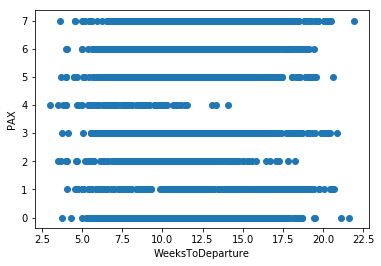

In [445]:
import matplotlib.pyplot as plt
%matplotlib inline

column_name = 'WeeksToDeparture'

plt.scatter(df_train[[column_name]], y_train)

plt.xlabel(column_name)
plt.ylabel('PAX')

# line from (x0, y0) to (x1, y1)
#plt.plot([x0, x1], [y0, y1], color='k', linestyle='-', linewidth=2)

Χρήση της βιβλιοθήκης `holidays` https://pypi.org/project/holidays, η οποία δημιουργεί λίστα με όλες τις ημερομηνίες των διακοπών σε μία συγκεκριμένη χώρα.

In [446]:
import datetime as dt
import holidays

us_holidays = holidays.UnitedStates()

print(dt.date(2019, 1, 1) in us_holidays)  # True
print(dt.date(2019, 1, 2) in us_holidays)  # False

True
False


Δημιουργία μεθόδου `isHoliday`, η οποία παίρνει σαν όρισμα μία ημερομηνία επιστρέφει την τιμή **1 (True)** αν η ημερομηνία βρίσκεται σε περίοδο διακοπών και την τιμή **0 (False)** διαφορετικά.

In [447]:
# date can be either a datetime.date object or a string with date format
def isHoliday(date):
    return 1 if date in us_holidays else 0

Δημιουργία επιπλέον στήλης `holidays` στον `df_train`.

In [448]:
df_train['holidays'] = df_train['DateOfDeparture'].apply(isHoliday)

df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays
2755,2011-11-09,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0
1941,2012-11-02,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0
3424,2012-08-03,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0
4081,2012-09-21,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0
5505,2011-09-12,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0


Δημιουργία επιπλέον στήλης `holidays` στον `df_train`.

In [449]:
df_test['holidays'] = df_test['DateOfDeparture'].apply(isHoliday)

df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays
8833,2012-04-10,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0
2025,2012-02-27,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0
8209,2012-03-25,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0
7870,2011-11-08,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0
8085,2012-09-10,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0


Δημιουργία συνάρτησης `season`, η οποία μετατρέπει ένα `string` _(στη μορφή `year-month-day`)_ σε εποχή.

In [450]:
# Δημιουργία συνάρτησης string_to_date, η οποία μετατρέπει ένα string (στη μορφή year-month-day) σε date.
def string_to_date(string_date):
    string_date_list = string_date.split('-')
    
    year = int(string_date_list[0])
    month = int(string_date_list[1])
    day = int(string_date_list[2])
    
    return dt.datetime(year, month, day)

#Δημιουργία συνάρτησης date_to_season, η οποία μετατρέπει μία ημερομηνία σε εποχή.
def date_to_season(date):
    seasons = {
        'Spring':(3, 5),
        'Summer':(6, 8),
        'Autumn':(9, 11),
    }
    
    for season, (start, end) in seasons.items():
        if date.month >= start and date.month <= end:
            return season
    
    return 'Winter'

def string_to_season(string_date):
    return date_to_season(string_to_date(string_date))

Μετατροπή όλων των ημερομηνιών των πινάκων `df_train` και `df_test` σε `season`.

In [451]:
df_train['Season'] = df_train['DateOfDeparture'].apply(string_to_season)
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season
2755,2011-11-09,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0,Autumn
1941,2012-11-02,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0,Autumn
3424,2012-08-03,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0,Summer
4081,2012-09-21,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0,Autumn
5505,2011-09-12,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0,Autumn


In [452]:
df_test['Season'] = df_test['DateOfDeparture'].apply(string_to_season)
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season
8833,2012-04-10,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0,Spring
2025,2012-02-27,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0,Winter
8209,2012-03-25,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0,Spring
7870,2011-11-08,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0,Autumn
8085,2012-09-10,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0,Autumn


Μετατροπή των `seasons` του πίνακα `df_train` σε αριθμητικές τιμές που αντιστοιχούν στις εποχές.

In [453]:
enc.fit(df_train['Season'])
df_train['Season'] = enc.transform(df_train['Season'])

df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season
2755,2011-11-09,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0,0
1941,2012-11-02,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0,0
3424,2012-08-03,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0,2
4081,2012-09-21,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0,0
5505,2011-09-12,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0,0


Μετατροπή των `seasons` του πίνακα `df_test` σε αριθμητικές τιμές που αντιστοιχούν στις εποχές.

In [454]:
enc.fit(df_test['Season'])
df_test['Season'] = enc.transform(df_test['Season'])

df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season
8833,2012-04-10,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0,1
2025,2012-02-27,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0,3
8209,2012-03-25,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0,1
7870,2011-11-08,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0,0
8085,2012-09-10,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0,0


Διαχωρίζουμε το χρόνο, το μήνα και τη μέρα της αναχώρησης στους `df_train` και `df_test` από το `DateOfDeparture`.

In [455]:
def year_from_date(string_date):
    return string_to_date(string_date).year

def month_from_date(string_date):
    return string_to_date(string_date).month

def day_from_date(string_date):
    return string_to_date(string_date).weekday()

In [456]:
df_train['YearOfDeparture'] = df_train['DateOfDeparture'].apply(year_from_date)
df_train['MonthOfDeparture'] = df_train['DateOfDeparture'].apply(month_from_date)
df_train['DayOfDeparture'] = df_train['DateOfDeparture'].apply(day_from_date)

df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture
2755,2011-11-09,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0,0,2011,11,2
1941,2012-11-02,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0,0,2012,11,4
3424,2012-08-03,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0,2,2012,8,4
4081,2012-09-21,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0,0,2012,9,4
5505,2011-09-12,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0,0,2011,9,0


In [457]:
df_test['YearOfDeparture'] = df_test['DateOfDeparture'].apply(year_from_date)
df_test['MonthOfDeparture'] = df_test['DateOfDeparture'].apply(month_from_date)
df_test['DayOfDeparture'] = df_test['DateOfDeparture'].apply(day_from_date)

df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture
8833,2012-04-10,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0,1,2012,4,1
2025,2012-02-27,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0,3,2012,2,0
8209,2012-03-25,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0,1,2012,3,6
7870,2011-11-08,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0,0,2011,11,1
8085,2012-09-10,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0,0,2012,9,0


Αφαίρεση της στήλης `DateOfDeparture` από τους `df_train` και `df_test`.

In [458]:
df_train.drop(['DateOfDeparture'], axis=1, inplace=True)

df_train.head()

,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture
2755,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0,0,2011,11,2
1941,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0,0,2012,11,4
3424,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0,2,2012,8,4
4081,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0,0,2012,9,4
5505,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0,0,2011,9,0


In [459]:
df_test.drop(['DateOfDeparture'], axis=1, inplace=True)

df_test.head()

,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture
8833,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0,1,2012,4,1
2025,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0,3,2012,2,0
8209,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0,1,2012,3,6
7870,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0,0,2011,11,1
8085,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0,0,2012,9,0


Δημιουργία συνάρτησης `calculateDistanceFromLatLon` που υπολογίζει την απόσταση μεταξύ 2 γεωγραφικών συντεταγμένων.

In [460]:
from math import sin, cos, sqrt, atan2, radians
def calculateDistanceFromLatLon(lon1, lat1, lon2, lat2):
    # approximate radius of earth in km
    R = 6373.0
    
    lon1 = radians(abs(lon1))
    lat1 = radians(abs(lat1))
    lon2 = radians(abs(lon2))
    lat2 = radians(abs(lat2))

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

Χρήση της συνάρτησης `calculateDistanceFromLatLon` στους `df_train` και `df_test`.

In [461]:
distances = [calculateDistanceFromLatLon(row.LongitudeDeparture, row.LatitudeDeparture, row.LongitudeArrival, row.LatitudeArrival) for index, row in df_train.iterrows()]
df_train['Distance'] = distances

df_train.head()

,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance
2755,IAH,7,29.984433,-95.341442,ORD,3,41.978603,-87.904842,7.923077,7.847096,0,0,2011,11,2,823.505267
1941,DFW,4,32.896828,-97.037997,LAS,8,36.080056,-115.152250,7.777778,5.610448,0,0,2012,11,4,2016.491722
3424,LAX,9,33.942536,-118.408075,JFK,12,40.639751,-73.778925,18.945946,12.402836,0,2,2012,8,4,4955.860858
4081,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,11.833333,9.276744,0,0,2012,9,4,872.162320
5505,DFW,4,32.896828,-97.037997,DEN,5,39.861656,-104.673178,9.055556,6.457756,0,0,2011,9,0,860.175726


In [462]:
distances = [calculateDistanceFromLatLon(row.LongitudeDeparture, row.LatitudeDeparture, row.LongitudeArrival, row.LatitudeArrival) for index, row in df_test.iterrows()]
df_test['Distance'] = distances

df_test.head()

,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance
8833,LAX,9,33.942536,-118.408075,DEN,5,39.861656,-104.673178,11.619048,9.069047,0,1,2012,4,1,1544.881662
2025,LAX,9,33.942536,-118.408075,SEA,18,47.449000,-122.309306,10.913043,8.289715,0,3,2012,2,0,872.162320
8209,DFW,4,32.896828,-97.037997,PHL,15,39.871944,-75.241139,8.066667,6.562520,0,1,2012,3,6,2420.492812
7870,DFW,4,32.896828,-97.037997,SFO,17,37.618972,-122.374889,12.250000,8.033896,0,0,2011,11,1,2821.532925
8085,ATL,0,33.636719,-84.428067,ORD,3,41.978603,-87.904842,8.850000,6.318519,0,0,2012,9,0,390.647928


Αφαίρεση των στηλών `LongitudeDeparture`, `LatitudeDeparture`, `LongitudeArrival`, `LatitudeArrival` από τους `df_train` και `df_test`.

In [463]:
df_train.drop(['LongitudeDeparture', 'LatitudeDeparture', 'LongitudeArrival', 'LatitudeArrival'], axis=1, inplace=True)

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance
2755,IAH,7,ORD,3,7.923077,7.847096,0,0,2011,11,2,823.505267
1941,DFW,4,LAS,8,7.777778,5.610448,0,0,2012,11,4,2016.491722
3424,LAX,9,JFK,12,18.945946,12.402836,0,2,2012,8,4,4955.860858
4081,LAX,9,SEA,18,11.833333,9.276744,0,0,2012,9,4,872.162320
5505,DFW,4,DEN,5,9.055556,6.457756,0,0,2011,9,0,860.175726


In [464]:
df_test.drop(['LongitudeDeparture', 'LatitudeDeparture', 'LongitudeArrival', 'LatitudeArrival'], axis=1, inplace=True)

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance
8833,LAX,9,DEN,5,11.619048,9.069047,0,1,2012,4,1,1544.881662
2025,LAX,9,SEA,18,10.913043,8.289715,0,3,2012,2,0,872.162320
8209,DFW,4,PHL,15,8.066667,6.562520,0,1,2012,3,6,2420.492812
7870,DFW,4,SFO,17,12.250000,8.033896,0,0,2011,11,1,2821.532925
8085,ATL,0,ORD,3,8.850000,6.318519,0,0,2012,9,0,390.647928


Δημιουργία του χαρακτηριστικού `std_mean_combined` στο `df_train`.

In [465]:
combination = [(row.std_wtd / row.WeeksToDeparture) for index, row in df_train.iterrows()]
df_train['std_mean_combined'] = combination

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined
2755,IAH,7,ORD,3,7.923077,7.847096,0,0,2011,11,2,823.505267,0.990410
1941,DFW,4,LAS,8,7.777778,5.610448,0,0,2012,11,4,2016.491722,0.721343
3424,LAX,9,JFK,12,18.945946,12.402836,0,2,2012,8,4,4955.860858,0.654643
4081,LAX,9,SEA,18,11.833333,9.276744,0,0,2012,9,4,872.162320,0.783950
5505,DFW,4,DEN,5,9.055556,6.457756,0,0,2011,9,0,860.175726,0.713126


Δημιουργία του χαρακτηριστικού `std_mean_combined` στο `df_test`.

In [466]:
combination = [(row.std_wtd / row.WeeksToDeparture) for index, row in df_test.iterrows()]
df_test['std_mean_combined'] = combination

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,WeeksToDeparture,std_wtd,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined
8833,LAX,9,DEN,5,11.619048,9.069047,0,1,2012,4,1,1544.881662,0.780533
2025,LAX,9,SEA,18,10.913043,8.289715,0,3,2012,2,0,872.162320,0.759615
8209,DFW,4,PHL,15,8.066667,6.562520,0,1,2012,3,6,2420.492812,0.813536
7870,DFW,4,SFO,17,12.250000,8.033896,0,0,2011,11,1,2821.532925,0.655828
8085,ATL,0,ORD,3,8.850000,6.318519,0,0,2012,9,0,390.647928,0.713957


Αφαίρεση των στηλών `WeeksToDeparture`, και `std_wtd` από τον `df_train`.

In [467]:
df_train.drop(['WeeksToDeparture', 'std_wtd'], axis=1, inplace=True)

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined
2755,IAH,7,ORD,3,0,0,2011,11,2,823.505267,0.990410
1941,DFW,4,LAS,8,0,0,2012,11,4,2016.491722,0.721343
3424,LAX,9,JFK,12,0,2,2012,8,4,4955.860858,0.654643
4081,LAX,9,SEA,18,0,0,2012,9,4,872.162320,0.783950
5505,DFW,4,DEN,5,0,0,2011,9,0,860.175726,0.713126


Αφαίρεση των στηλών `WeeksToDeparture`, και `std_wtd` από τον `df_test`.

In [468]:
df_test.drop(['WeeksToDeparture', 'std_wtd'], axis=1, inplace=True)

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined
8833,LAX,9,DEN,5,0,1,2012,4,1,1544.881662,0.780533
2025,LAX,9,SEA,18,0,3,2012,2,0,872.162320,0.759615
8209,DFW,4,PHL,15,0,1,2012,3,6,2420.492812,0.813536
7870,DFW,4,SFO,17,0,0,2011,11,1,2821.532925,0.655828
8085,ATL,0,ORD,3,0,0,2012,9,0,390.647928,0.713957


Δημιουργία του χαρακτηριστικού `ETA` στον `df_train` χρησιμοποιώντας το `Distance`.

In [469]:
average_speed = 600

eta = [(row.Distance / average_speed) for index, row in df_train.iterrows()]
df_train['ETA'] = eta

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA
2755,IAH,7,ORD,3,0,0,2011,11,2,823.505267,0.990410,1.372509
1941,DFW,4,LAS,8,0,0,2012,11,4,2016.491722,0.721343,3.360820
3424,LAX,9,JFK,12,0,2,2012,8,4,4955.860858,0.654643,8.259768
4081,LAX,9,SEA,18,0,0,2012,9,4,872.162320,0.783950,1.453604
5505,DFW,4,DEN,5,0,0,2011,9,0,860.175726,0.713126,1.433626


Δημιουργία του χαρακτηριστικού `ETA` στον `df_test` χρησιμοποιώντας το `Distance`.

In [470]:
eta = [(row.Distance / average_speed) for index, row in df_test.iterrows()]
df_test['ETA'] = eta

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA
8833,LAX,9,DEN,5,0,1,2012,4,1,1544.881662,0.780533,2.574803
2025,LAX,9,SEA,18,0,3,2012,2,0,872.162320,0.759615,1.453604
8209,DFW,4,PHL,15,0,1,2012,3,6,2420.492812,0.813536,4.034155
7870,DFW,4,SFO,17,0,0,2011,11,1,2821.532925,0.655828,4.702555
8085,ATL,0,ORD,3,0,0,2012,9,0,390.647928,0.713957,0.651080


Δημιουργία χαρακτηριστικού `cost` στον `df_train` χρησιμοποιώντας το `Distance`.

In [471]:
cost = [((190 * row.Distance) / 46) for index, row in df_train.iterrows()]
df_train['cost'] = cost

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
2755,IAH,7,ORD,3,0,0,2011,11,2,823.505267,0.990410,1.372509,3401.434800
1941,DFW,4,LAS,8,0,0,2012,11,4,2016.491722,0.721343,3.360820,8328.987548
3424,LAX,9,JFK,12,0,2,2012,8,4,4955.860858,0.654643,8.259768,20469.860066
4081,LAX,9,SEA,18,0,0,2012,9,4,872.162320,0.783950,1.453604,3602.409582
5505,DFW,4,DEN,5,0,0,2011,9,0,860.175726,0.713126,1.433626,3552.899736


Δημιουργία χαρακτηριστικού `cost` στον `df_train` χρησιμοποιώντας το `Distance`.

In [472]:
cost = [((190 * row.Distance) / 46) for index, row in df_test.iterrows()]
df_test['cost'] = cost

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
8833,LAX,9,DEN,5,0,1,2012,4,1,1544.881662,0.780533,2.574803,6381.032953
2025,LAX,9,SEA,18,0,3,2012,2,0,872.162320,0.759615,1.453604,3602.409582
8209,DFW,4,PHL,15,0,1,2012,3,6,2420.492812,0.813536,4.034155,9997.687703
7870,DFW,4,SFO,17,0,0,2011,11,1,2821.532925,0.655828,4.702555,11654.157735
8085,ATL,0,ORD,3,0,0,2012,9,0,390.647928,0.713957,0.651080,1613.545788


Μετατροπή των `Departure` και `Arrival` του πίνακα `df_train` σε αριθμητικές τιμές.

In [473]:
enc.fit(df_train['Departure'])
df_train['Departure'] = enc.transform(df_train['Departure'])
enc.fit(df_train['Arrival'])
df_train['Arrival'] = enc.transform(df_train['Arrival'])

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
2755,7,7,15,3,0,0,2011,11,2,823.505267,0.990410,1.372509,3401.434800
1941,4,4,9,8,0,0,2012,11,4,2016.491722,0.721343,3.360820,8328.987548
3424,10,9,8,12,0,2,2012,8,4,4955.860858,0.654643,8.259768,20469.860066
4081,10,9,18,18,0,0,2012,9,4,872.162320,0.783950,1.453604,3602.409582
5505,4,4,3,5,0,0,2011,9,0,860.175726,0.713126,1.433626,3552.899736


Μετατροπή των `Departure` και `Arrival` του πίνακα `df_test` σε αριθμητικές τιμές που αντιστοιχούν στις εποχές.

In [474]:
enc.fit(df_test['Departure'])
df_test['Departure'] = enc.transform(df_test['Departure'])
enc.fit(df_test['Arrival'])
df_test['Arrival'] = enc.transform(df_test['Arrival'])

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
8833,10,9,3,5,0,1,2012,4,1,1544.881662,0.780533,2.574803,6381.032953
2025,10,9,18,18,0,3,2012,2,0,872.162320,0.759615,1.453604,3602.409582
8209,4,4,16,15,0,1,2012,3,6,2420.492812,0.813536,4.034155,9997.687703
7870,4,4,19,17,0,0,2011,11,1,2821.532925,0.655828,4.702555,11654.157735
8085,0,0,15,3,0,0,2012,9,0,390.647928,0.713957,0.651080,1613.545788


Οπτικοποιούμε όλες τις μεταβλητές ως προς όλες τις άλλες στο `df_train`.

In [475]:
from  pandas.plotting import scatter_matrix
#scatter_matrix(df_train,alpha=0.2 ,figsize=(20, 20), diagonal='kde')

Στρογγυλοποιούμε τις τιμές των στηλών `Distance` και `cost` του `df_train`.

In [476]:
df_train['Distance'] = df_train['Distance'].apply(round)
df_train['cost'] = df_train['cost'].apply(round)

df_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
2755,7,7,15,3,0,0,2011,11,2,824,0.990410,1.372509,3401
1941,4,4,9,8,0,0,2012,11,4,2016,0.721343,3.360820,8329
3424,10,9,8,12,0,2,2012,8,4,4956,0.654643,8.259768,20470
4081,10,9,18,18,0,0,2012,9,4,872,0.783950,1.453604,3602
5505,4,4,3,5,0,0,2011,9,0,860,0.713126,1.433626,3553


Στρογγυλοποιούμε τις τιμές των στηλών `Distance` και `cost` του `df_test`.

In [ ]:
df_test['Distance'] = df_test['Distance'].apply(round)
df_test['cost'] = df_test['cost'].apply(round)

df_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
8833,10,9,3,5,0,1,2012,4,1,1545,0.780533,2.574803,6381
2025,10,9,18,18,0,3,2012,2,0,872,0.759615,1.453604,3602
8209,4,4,16,15,0,1,2012,3,6,2420,0.813536,4.034155,9998
7870,4,4,19,17,0,0,2011,11,1,2822,0.655828,4.702555,11654
8085,0,0,15,3,0,0,2012,9,0,391,0.713957,0.651080,1614


Αντιγραφή των πινάκων `df_train` και `df_test` σε 2 πίνακες `X_train` και `X_test`.

In [ ]:
import numpy as np

X_train = df_train.copy()
X_test = df_test.copy()

X_train.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
2755,7,7,15,3,0,0,2011,11,2,824,0.990410,1.372509,3401
1941,4,4,9,8,0,0,2012,11,4,2016,0.721343,3.360820,8329
3424,10,9,8,12,0,2,2012,8,4,4956,0.654643,8.259768,20470
4081,10,9,18,18,0,0,2012,9,4,872,0.783950,1.453604,3602
5505,4,4,3,5,0,0,2011,9,0,860,0.713126,1.433626,3553


In [ ]:
X_test.head()

,Departure,CityDeparture,Arrival,CityArrival,holidays,Season,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
8833,10,9,3,5,0,1,2012,4,1,1545,0.780533,2.574803,6381
2025,10,9,18,18,0,3,2012,2,0,872,0.759615,1.453604,3602
8209,4,4,16,15,0,1,2012,3,6,2420,0.813536,4.034155,9998
7870,4,4,19,17,0,0,2011,11,1,2822,0.655828,4.702555,11654
8085,0,0,15,3,0,0,2012,9,0,391,0.713957,0.651080,1614


**BRUTE FORCE**
(CHECK THE WHOLE SUPERSET).

In [ ]:
if False:
    import random
    from sklearn.ensemble import RandomForestClassifier
    from IPython.display import clear_output
    from sklearn.metrics import f1_score

    elements = ['YearOfDeparture', 'Departure', 'CityDeparture', 'Arrival', 'CityArrival', 'holidays', 'Season', 'MonthOfDeparture', 'DayOfDeparture', 'Distance', 'std_mean_combined', 'ETA']
    sets = [set([])]
    for n in elements:
        sets.extend([s | {n} for s in sets])
    
    temp = []
    
    max_score = 0
    i = 0
    for s in sets:
        i = i + 1

        #clear_output()
        #print('done', ((i/len(sets)) * 100), '%')

        s = list(s)

        if len(s) != 0 and len(s) != len(elements):
            X_train = df_train.copy()
            X_test = df_test.copy()

            columns = s

            X_train.drop(columns, axis=1, inplace=True)
            X_test.drop(columns, axis=1, inplace=True)

            y_train = np.ravel(y_train)

            numbers = [i for i in range(30, 45)]
            numbers = [32]
            for n in numbers:
                clf = RandomForestClassifier(n_estimators=n, random_state=7)

                clf.fit(X_train, y_train)

                y_pred = clf.predict(X_test)

                score = f1_score(y_test, y_pred, average='micro')
                temp.append([score, columns, n])
                if score > 0.515:
                    print(score, 'by dropping', columns, 'and using n_estimators =', n)
                if score > max_score:
                    max_score = score
                    best_set = columns.copy()
                    best_n = n
            

    print('max score:', max_score, 'achieved by dropping:', best_set, 'and using n_estimators =', best_n)

    for t in sorted(temp, key=lambda temp: temp[0]):
        print(t)

**BRUTE FORCE**
(CHECK THE WHOLE SUPERSET).

In [ ]:
if True:
    import random
    from sklearn.neural_network import MLPClassifier
    from sklearn.preprocessing import StandardScaler
    from IPython.display import clear_output
    from sklearn.metrics import f1_score
    
    scaler = StandardScaler()
    
    elements = ['YearOfDeparture', 'Departure', 'CityDeparture', 'Arrival', 'CityArrival', 'holidays', 'Season', 'MonthOfDeparture', 'DayOfDeparture', 'Distance', 'std_mean_combined', 'ETA']
    sets = [set([])]
    for n in elements:
        sets.extend([s | {n} for s in sets])
    
    temp = []
    
    max_score = 0
    i = 0
    for s in sets:
        i = i + 1

        #clear_output()
        print('done', ((i/len(sets)) * 100), '%')

        s = list(s)

        if len(s) != 0 and len(s) != len(elements):
            X_train = df_train.copy()
            X_test = df_test.copy()

            columns = s

            X_train.drop(columns, axis=1, inplace=True)
            X_test.drop(columns, axis=1, inplace=True)
            
            X_train = X_train.values
            X_test = X_test.values

            y_train = np.ravel(y_train)
            y_test = np.ravel(y_test)
            
            # Don't cheat - fit only on training data
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            # apply same transformation to test data
            X_test = scaler.transform(X_test)

            clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20,), activation='logistic', solver='sgd', max_iter=800, verbose=False,
                                    learning_rate='adaptive', learning_rate_init=0.1, random_state=16)

            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)

            score = f1_score(y_test, y_pred, average='micro')
            temp.append([score, columns, n])
            if score > 0.55:
                print(score, 'by dropping', columns)
            if score > max_score:
                max_score = score
                best_set = columns.copy()
                best_n = n
                    
    print('max score:', max_score, 'achieved by dropping:', best_set)

    for t in sorted(temp, key=lambda temp: temp[0]):
        print(t)

done 0.0244140625 %
done 0.048828125 %
0.5567415730337079 by dropping ['YearOfDeparture']
done 0.0732421875 %
done 0.09765625 %
done 0.1220703125 %
done 0.146484375 %
done 0.1708984375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.1953125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.2197265625 %
done 0.244140625 %
done 0.2685546875 %
done 0.29296875 %
done 0.3173828125 %
done 0.341796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.3662109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.390625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.4150390625 %
done 0.439453125 %
done 0.4638671875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.48828125 %
done 0.5126953125 %
done 0.537109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.5615234375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.5859375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.6103515625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.634765625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.6591796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.68359375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.7080078125 %
done 0.732421875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.7568359375 %
done 0.78125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.8056640625 %
done 0.830078125 %
done 0.8544921875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.87890625 %
done 0.9033203125 %
done 0.927734375 %
done 0.9521484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 0.9765625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.0009765625 %
done 1.025390625 %
done 1.0498046875 %
done 1.07421875 %
done 1.0986328125 %
done 1.123046875 %
done 1.1474609375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.171875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.1962890625 %
done 1.220703125 %
done 1.2451171875 %
done 1.26953125 %
done 1.2939453125 %
done 1.318359375 %
done 1.3427734375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.3671875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.3916015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.416015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.4404296875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.46484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.4892578125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.513671875 %
done 1.5380859375 %
done 1.5625 %
done 1.5869140625 %
done 1.611328125 %
done 1.6357421875 %
done 1.66015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.6845703125 %
done 1.708984375 %
done 1.7333984375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.7578125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.7822265625 %
done 1.806640625 %
done 1.8310546875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.85546875 %
done 1.8798828125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.904296875 %
done 1.9287109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.953125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 1.9775390625 %
done 2.001953125 %
done 2.0263671875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.05078125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.0751953125 %
done 2.099609375 %
done 2.1240234375 %
done 2.1484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.1728515625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.197265625 %
done 2.2216796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.24609375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.2705078125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.294921875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.3193359375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.34375 %
done 2.3681640625 %
done 2.392578125 %
done 2.4169921875 %
done 2.44140625 %
done 2.4658203125 %
done 2.490234375 %
done 2.5146484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.5390625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.5634765625 %
done 2.587890625 %
done 2.6123046875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.63671875 %
done 2.6611328125 %
done 2.685546875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.7099609375 %
done 2.734375 %
done 2.7587890625 %
done 2.783203125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.8076171875 %
done 2.83203125 %
done 2.8564453125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.880859375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.9052734375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.9296875 %
done 2.9541015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 2.978515625 %
done 3.0029296875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.02734375 %
done 3.0517578125 %
done 3.076171875 %
done 3.1005859375 %
done 3.125 %
done 3.1494140625 %
done 3.173828125 %
done 3.1982421875 %
done 3.22265625 %
done 3.2470703125 %
done 3.271484375 %
done 3.2958984375 %
done 3.3203125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.3447265625 %
done 3.369140625 %
done 3.3935546875 %
done 3.41796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.4423828125 %
done 3.466796875 %
done 3.4912109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.515625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.5400390625 %
done 3.564453125 %
done 3.5888671875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.61328125 %
done 3.6376953125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.662109375 %
done 3.6865234375 %
done 3.7109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.7353515625 %
done 3.759765625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.7841796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.80859375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.8330078125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.857421875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.8818359375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 3.90625 %
done 3.9306640625 %
done 3.955078125 %
done 3.9794921875 %
done 4.00390625 %
done 4.0283203125 %
done 4.052734375 %
done 4.0771484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.1015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.1259765625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.150390625 %
done 4.1748046875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.19921875 %
done 4.2236328125 %
done 4.248046875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.2724609375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.296875 %
done 4.3212890625 %
done 4.345703125 %
done 4.3701171875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.39453125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.4189453125 %
done 4.443359375 %
done 4.4677734375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.4921875 %
done 4.5166015625 %
done 4.541015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.5654296875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.58984375 %
done 4.6142578125 %
done 4.638671875 %
done 4.6630859375 %
done 4.6875 %
done 4.7119140625 %
done 4.736328125 %
done 4.7607421875 %
done 4.78515625 %
done 4.8095703125 %
done 4.833984375 %
done 4.8583984375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.8828125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 4.9072265625 %
done 4.931640625 %
done 4.9560546875 %
done 4.98046875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.0048828125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.029296875 %
done 5.0537109375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.078125 %
done 5.1025390625 %
done 5.126953125 %
done 5.1513671875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.17578125 %
done 5.2001953125 %
done 5.224609375 %
done 5.2490234375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.2734375 %
done 5.2978515625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.322265625 %
done 5.3466796875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.37109375 %
done 5.3955078125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.419921875 %
done 5.4443359375 %
done 5.46875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.4931640625 %
done 5.517578125 %
done 5.5419921875 %
done 5.56640625 %
done 5.5908203125 %
done 5.615234375 %
done 5.6396484375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.6640625 %
done 5.6884765625 %
done 5.712890625 %
done 5.7373046875 %
done 5.76171875 %
done 5.7861328125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.810546875 %
done 5.8349609375 %
done 5.859375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 5.8837890625 %
done 5.908203125 %
done 5.9326171875 %
done 5.95703125 %
done 5.9814453125 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.005859375 %
done 6.0302734375 %
done 6.0546875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.0791015625 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.103515625 %
done 6.1279296875 %
done 6.15234375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.1767578125 %
done 6.201171875 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.2255859375 %


c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done 6.25 %
done 6.2744140625 %
done 6.298828125 %
done 6.3232421875 %
done 6.34765625 %
done 6.3720703125 %
done 6.396484375 %


**BRUTE FORCE RANDOM_STATE**
(CHECK THE WHOLE SUPERSET).

In [418]:
if False:
    from sklearn.preprocessing import StandardScaler  
    scaler = StandardScaler()
    # Don't cheat - fit only on training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # apply same transformation to test data
    X_test = scaler.transform(X_test)

    from sklearn.neural_network import MLPClassifier

    #clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20,), activation='logistic', solver='sgd', max_iter=1500, verbose=True,
    #                    learning_rate='adaptive', learning_rate_init=0.1, random_state=100) # .51

    for i in range(100):
        clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20,), activation='logistic', solver='sgd', max_iter=800, verbose=False,
                            learning_rate='adaptive', learning_rate_init=0.1, random_state=i) # .51

        clf.fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred = clf.predict(X_test)

        print('random_state =', i)
        if not submission:
            y_pred_from_csv = np.loadtxt('y_pred_mlp.csv', delimiter=",", skiprows=1, usecols=[1])
            print('On train:\t', f1_score(y_train, y_pred_train, average='micro'))

            print('On test:\t', f1_score(y_test, y_pred, average='micro'))
            score = f1_score(y_test, y_pred, average='micro')

            if i == 1:
                max_score = score
                best_i = i
            else:
                if score > max_score:
                    max_score = score
                    best_i = i

    print('Max score:', max_score, 'with i =', best_i)

Αφαίρεση στηλών που θέλουμε να αγνοήσουμε στην εκπαίδευση από τους `X_train` και `X_test`.

In [419]:
#columns = ['std_mean_combined', 'Distance', 'Arrival', 'CityDeparture', 'CityArrival', 'Departure', 'MonthOfDeparture', 'YearOfDeparture', 'Season']
#columns = ['Arrival', 'Departure', 'Season']
columns = ['YearOfDeparture']

X_train.drop(columns, axis=1, inplace=True)
X_test.drop(columns, axis=1, inplace=True)

Κανονικοποιούμε τις στήλες που θέλουμε στα δεδομένα μας. https://www.kaggle.com/parasjindal96/how-to-normalize-dataframe-pandas

In [420]:
'''columns = ['Distance']
max_normalize_range = 1

X_train[columns] = ((X_train[columns] - X_train[columns].min()) / (X_train[columns].max() - X_train[columns].min())) * max_normalize_range
X_test[columns] = ((X_test[columns] - X_test[columns].min()) / (X_test[columns].max() - X_test[columns].min())) * max_normalize_range
'''

"columns = ['Distance']\nmax_normalize_range = 1\n\nX_train[columns] = ((X_train[columns] - X_train[columns].min()) / (X_train[columns].max() - X_train[columns].min())) * max_normalize_range\nX_test[columns] = ((X_test[columns] - X_test[columns].min()) / (X_test[columns].max() - X_test[columns].min())) * max_normalize_range\n"

Εμφάνιση των `X_train` και `X_test` ακριβώς πριν την εκπαίδευση.

In [421]:
X_train.head()

,CityDeparture,CityArrival,holidays,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
2755,7,3,0,2011,11,2,824,0.990410,1.372509,3401
1941,4,8,0,2012,11,4,2016,0.721343,3.360820,8329
3424,9,12,0,2012,8,4,4956,0.654643,8.259768,20470
4081,9,18,0,2012,9,4,872,0.783950,1.453604,3602
5505,4,5,0,2011,9,0,860,0.713126,1.433626,3553


In [422]:
X_test.head()

,CityDeparture,CityArrival,holidays,YearOfDeparture,MonthOfDeparture,DayOfDeparture,Distance,std_mean_combined,ETA,cost
8833,9,5,0,2012,4,1,1545,0.780533,2.574803,6381
2025,9,18,0,2012,2,0,872,0.759615,1.453604,3602
8209,4,15,0,2012,3,6,2420,0.813536,4.034155,9998
7870,4,17,0,2011,11,1,2822,0.655828,4.702555,11654
8085,0,3,0,2012,9,0,391,0.713957,0.651080,1614


Αφαιρούμε τις διπλοεγγραφές του `X_train` και τις αντίστοιχες τιμές τους στον `y_train`.

In [423]:
#X_train.info()

In [424]:
'''# making a bool series 
bool_series = X_train.duplicated(keep = False)

# bool series 
print(bool_series.sum())

# passing NOT of bool series to see unique values only 
X_train = X_train[~bool_series]
y_train = y_train[~bool_series]

# displaying data
X_train.info()
#X_train

#y_train.info()
#y_train'''

'# making a bool series \nbool_series = X_train.duplicated(keep = False)\n\n# bool series \nprint(bool_series.sum())\n\n# passing NOT of bool series to see unique values only \nX_train = X_train[~bool_series]\ny_train = y_train[~bool_series]\n\n# displaying data\nX_train.info()\n#X_train\n\n#y_train.info()\n#y_train'

Μετατροπή των `Dataframes` σε `numpy arrays`.<br>
Ανασχηματισμός του `y_train`.

In [425]:
X_train = X_train.values
X_test = X_test.values

#y_test = y_test.values

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Χρήση `KNN`.

In [426]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

k = 44

clf = KNeighborsClassifier(k, algorithm = 'kd_tree', p = 1, leaf_size = 45)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Καταγραφή των αποτελεσμάτων σε ένα αρχείο `csv`.

In [427]:
import csv
with open('y_pred_knn.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]])

Χρησιμοποιούμε την `f1_score` για να υπολογίσουμε την ακρίβεια του μοντέλου.

In [428]:
if not submission:
    y_pred_from_csv = np.loadtxt('y_pred_knn.csv', delimiter=",", skiprows=1, usecols=[1])
    print('RAM:\t', f1_score(y_test, y_pred, average='micro'))
    print('File:\t', f1_score(y_test, y_pred_from_csv, average='micro'))

RAM:	 0.4140449438202247
File:	 0.4140449438202247


Χρήση `Decision tree`.

In [429]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Καταγραφή των αποτελεσμάτων σε ένα αρχείο `csv`.

In [430]:
with open('y_pred_dt.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]])

Χρησιμοποιούμε την `f1_score` για να υπολογίσουμε την ακρίβεια του μοντέλου.

In [431]:
if not submission:
    y_pred_from_csv = np.loadtxt('y_pred_dt.csv', delimiter=",", skiprows=1, usecols=[1])
    print('RAM:\t', f1_score(y_test, y_pred, average='micro'))
    print('File:\t', f1_score(y_test, y_pred_from_csv, average='micro'))

RAM:	 0.4449438202247191
File:	 0.4449438202247191


Χρήση `RandomForest`.

In [432]:
from sklearn.ensemble import RandomForestClassifier

n = 32

clf = RandomForestClassifier(n_estimators=n, random_state=7)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Καταγραφή των αποτελεσμάτων σε ένα αρχείο `csv`.

In [433]:
with open('y_pred_rf.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]])

Χρησιμοποιούμε την `f1_score` για να υπολογίσουμε την ακρίβεια του μοντέλου.

In [434]:
if not submission:
    y_pred_from_csv = np.loadtxt('y_pred_rf.csv', delimiter=",", skiprows=1, usecols=[1])
    print('RAM:\t', f1_score(y_test, y_pred, average='micro'))
    print('File:\t', f1_score(y_test, y_pred_from_csv, average='micro'))

RAM:	 0.5207865168539326
File:	 0.5207865168539326


Χρήση `NN` (sklearn).

In [435]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20,), activation='logistic', solver='sgd', max_iter=800, verbose=False,
                    learning_rate='adaptive', learning_rate_init=0.1, random_state=16)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

c:\users\cc\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Καταγραφή των αποτελεσμάτων σε ένα αρχείο `csv`.

In [436]:
with open('y_pred_nn_sklearn.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]])

Χρησιμοποιούμε την `f1_score` για να υπολογίσουμε την ακρίβεια του μοντέλου.

In [437]:
if not submission:
    y_pred_from_csv = np.loadtxt('y_pred_nn_sklearn.csv', delimiter=",", skiprows=1, usecols=[1])
    print('On train data:\t', f1_score(y_train, y_pred_train, average='micro'))
    print('On test data:\t', f1_score(y_test, y_pred_from_csv, average='micro'))

On train data:	 0.5169265346256496
On test data:	 0.46797752808988763


In [354]:
'''from sklearn.neural_network import MLPClassifier
import random

# Choose your classifier
mlp = MLPClassifier(max_iter=1)

# Define a hyper-parameter space to search
parameter_space = {
    'hidden_layer_sizes': [(20, 20, 20), (20, 20, 15), (20,), (50, 25), (30, 20, 10), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'random_state': [50],
}

# Run the search
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# See the best results
# Best paramete set
print('Best parameters found:\n', clf.best_params_)'''

"from sklearn.neural_network import MLPClassifier\nimport random\n\n# Choose your classifier\nmlp = MLPClassifier(max_iter=1)\n\n# Define a hyper-parameter space to search\nparameter_space = {\n    'hidden_layer_sizes': [(20, 20, 20), (20, 20, 15), (20,), (50, 25), (30, 20, 10), (100, 50)],\n    'activation': ['logistic', 'tanh', 'relu'],\n    'solver': ['sgd', 'adam'],\n    'random_state': [50],\n}\n\n# Run the search\nfrom sklearn.model_selection import GridSearchCV\n\nclf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)\nclf.fit(X_train, y_train)\n\n# See the best results\n# Best paramete set\nprint('Best parameters found:\n', clf.best_params_)"

Χρήση `NN` (Keras).

In [2443]:
import keras
from keras.models import Sequential

model = Sequential()

Μετατροπή των κλάσεων σε binary πίνακες.

In [2444]:
# convert class vectors to binary class matrices
num_classes = 8

print('Before conversion:\n', y_train)
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
print('After conversion:\n', y_train)

y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

Before conversion:
 [6 5 1 ... 6 3 6]
After conversion:
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [2445]:
#print(y_train)
#print(X_train)
#len(X_train[0])

Προσθήκη `layers` στο μοντέλο `model`.

In [2446]:
from keras.layers import Dense, Dropout

model.add(Dense(units=1200, activation='sigmoid', input_dim=len(X_train[0])))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='softmax'))

Κάνουμε `compile` το μοντέλο μας.

In [2447]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(lr=10),
              metrics=['accuracy'])

_Ανασκόπηση μοντέλου._

In [2448]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1200)              16800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 9608      
Total params: 26,408
Trainable params: 26,408
Non-trainable params: 0
_________________________________________________________________


Εκπαίδευση του μοντέλου `model`.

In [2449]:
epochs = 200
batch_size = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7119 samples, validate on 1780 samples
Epoch 1/200
7119/7119 [==============================] - 3s 452us/step - loss: 0.1932 - acc: 0.2252 - val_loss: 0.2029 - val_acc: 0.1882
Epoch 2/200
7119/7119 [==============================] - ETA: 0s - loss: 0.2021 - acc: 0.190 - 3s 385us/step - loss: 0.2023 - acc: 0.1892 - val_loss: 0.2029 - val_acc: 0.1882
Epoch 3/200
7119/7119 [==============================] - 3s 396us/step - loss: 0.2054 - acc: 0.1780 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 4/200
7119/7119 [==============================] - 3s 392us/step - loss: 0.1891 - acc: 0.2422 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 5/200
7119/7119 [==============================] - 3s 399us/step - loss: 0.1946 - acc: 0.2160 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 6/200
7119/7119 [==============================] - 3s 409us/step - loss: 0.1908 - acc: 0.2297 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 7/200
7119/7119 [==============================] - 3s 413us/step - loss: 0.1926 - acc:

Epoch 60/200
7119/7119 [==============================] - 4s 587us/step - loss: 0.2103 - acc: 0.1558 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 61/200
7119/7119 [==============================] - 5s 645us/step - loss: 0.1911 - acc: 0.2287 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 62/200
7119/7119 [==============================] - ETA: 0s - loss: 0.1894 - acc: 0.239 - 4s 563us/step - loss: 0.1894 - acc: 0.2392 - val_loss: 0.1907 - val_acc: 0.2371
Epoch 63/200
4915/7119 [===================>..........] - ETA: 1s - loss: 0.1896 - acc: 0.2366

KeyboardInterrupt: 

Πρόβλεψη του μοντέλου `model` για τα `X_test`.

In [ ]:
y_pred = model.predict(X_test, batch_size=10)

In [ ]:
y_pred_fixed = []
for i in range(y_pred.shape[0]):
    y_pred_fixed.append(np.argmax(y_pred[i], axis=None, out=None))

y_test_fixed = []
for i in range(y_test.shape[0]):
    y_test_fixed.append(np.argmax(y_test[i], axis=None, out=None))

Καταγραφή των αποτελεσμάτων σε ένα αρχείο `csv`.

In [ ]:
with open('y_pred_NN.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(len(y_pred_fixed)):
        writer.writerow([i, y_pred_fixed[i]])

Χρησιμοποιούμε την `f1_score` για να υπολογίσουμε την ακρίβεια του μοντέλου.

In [ ]:
y_pred_from_csv = np.loadtxt('y_pred_NN.csv', delimiter=",", skiprows=1, usecols=[1])
print('RAM:\t', f1_score(y_test_fixed, y_pred_fixed, average='micro'))
print('File:\t', f1_score(y_test_fixed, y_pred_from_csv, average='micro'))